In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns



In [13]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [14]:
path = r'Real estate valuation data set.xlsx'

In [15]:

data = pd.read_excel(path)

In [16]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [18]:
data.rename(columns={"X1 transaction date": "transaction date", 
                     "X2 house age": "house age", 
                     "X3 distance to the nearest MRT station": "distance to the nearest MRT station",
                     "X4 number of convenience stores":"number of convenience stores",
                     "X5 latitude":"latitude",
                     "X6 longitude":"longitude",
                     "Y house price of unit area": "house price of unit area"
                     }, inplace=True)

In [19]:
data.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

In [20]:
data.duplicated().count()

414

In [21]:
data.nunique()

No                                     414
transaction date                        12
house age                              236
distance to the nearest MRT station    259
number of convenience stores            11
latitude                               234
longitude                              232
house price of unit area               270
dtype: int64

In [22]:
data.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [23]:
data.shape

(414, 8)

In [24]:
data.skew()

No                                     0.000000
transaction date                      -0.150834
house age                              0.382926
distance to the nearest MRT station    1.888757
number of convenience stores           0.154607
latitude                              -0.438598
longitude                             -1.219591
house price of unit area               0.599853
dtype: float64

In [25]:
data.corr()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


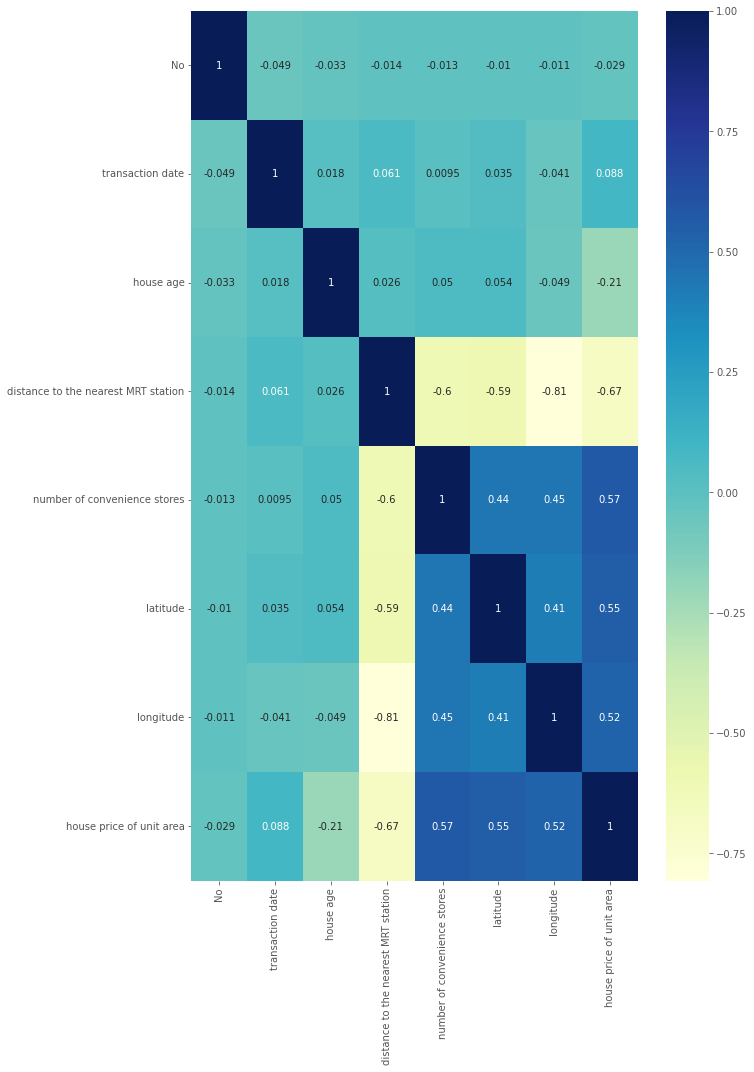

In [26]:
plt.figure(figsize=(10,16))
ax = sns.heatmap(data.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


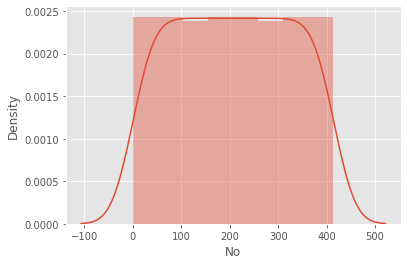

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


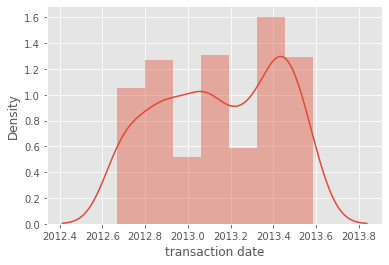

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


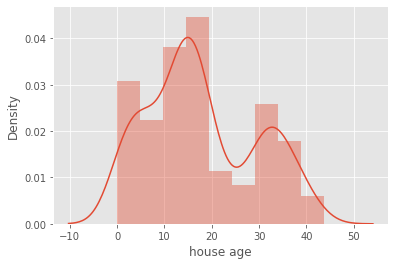

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


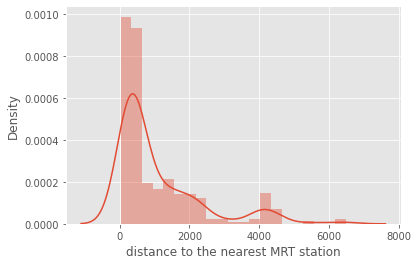

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


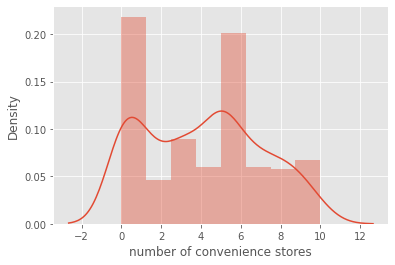

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


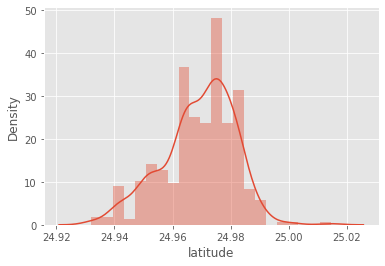

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


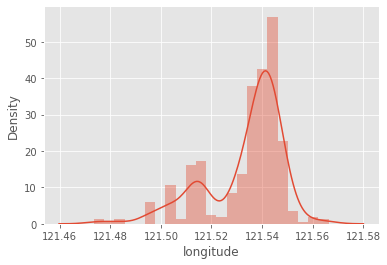

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


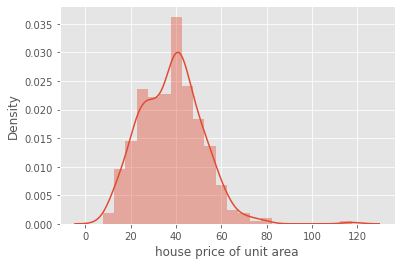

In [27]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

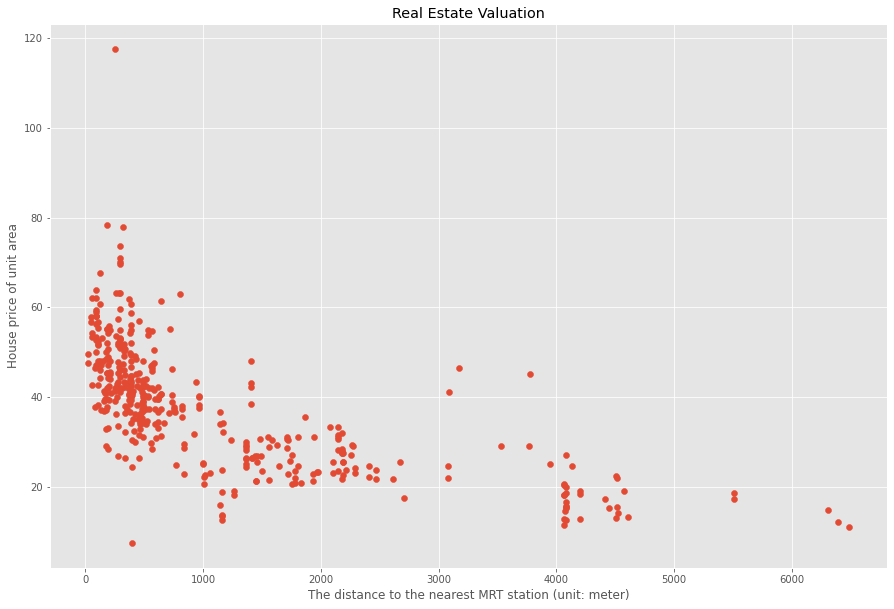

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(x=data['distance to the nearest MRT station'], y=data['house price of unit area'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

In [29]:
X = np.array(data['distance to the nearest MRT station']).reshape(-1,1)
y = np.array(data['house price of unit area']).reshape(-1,1)

In [30]:
X[1]

array([306.5947])

In [31]:
y[1]

array([42.2])

In [32]:
len(X), len(y)

(414, 414)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 1), (83, 1), (331,), (83,))

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression()

In [35]:
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
regr.predict([[100]])

array([45.03826274])

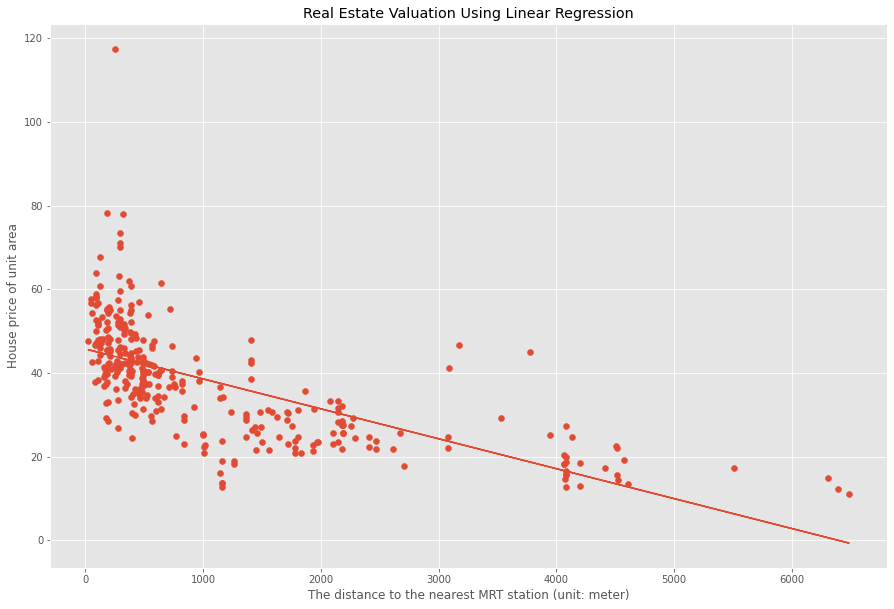

In [37]:
plt.figure(figsize = (15, 10))
plt.scatter(X_train, y_train) 
plt.plot(X_train, regr.predict(X_train))
plt.title('Real Estate Valuation Using Linear Regression')
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.show() 

In [38]:
y_pred = regr.predict(X_test)

In [39]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,7.488225
MSE,98.043152
RMSE,9.901674


In [40]:
test_residuals = y_test - y_pred

Text(0, 0.5, 'Y-Pred')

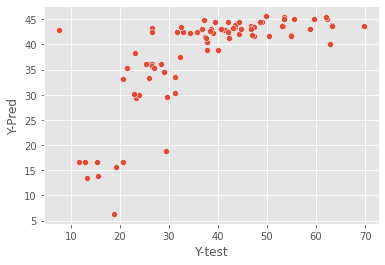

In [41]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-test')
plt.ylabel('Y-Pred')

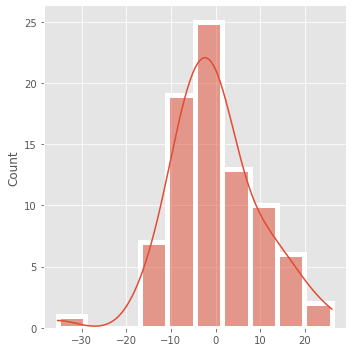

In [42]:
sns.displot(test_residuals, bins=10, kde=True, edgecolor='white', linewidth=5)

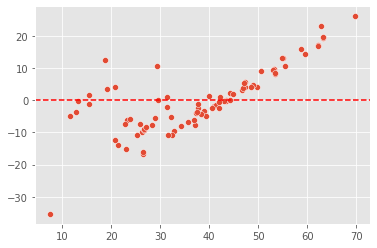

In [43]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')